In [21]:
import pandas as pd
import numpy as np
import string
import re
import pickle
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
import pandas as pd

fake_df = pd.read_csv("/kaggle/input/fake-and-real-news-dataset/Fake.csv", engine='python')
real_df = pd.read_csv("/kaggle/input/fake-and-real-news-dataset/True.csv", engine='python')

# Add labels
fake_df["label"] = "FAKE"
real_df["label"] = "REAL"

# Combine and shuffle
df = pd.concat([fake_df, real_df]).sample(frac=1).reset_index(drop=True)
df.to_csv("fake_or_real_news.csv", index=False)  # Optional: save to file
print("Data loaded:", df.shape)

Data loaded: (44898, 5)


In [13]:
df.head()

,title,text,subject,date,label
0,Ryan strikes conciliatory tone ahead of Trump ...,WASHINGTON (Reuters) - U.S. House Speaker Paul...,politicsNews,"May 11, 2016",REAL
1,WATCH: Stephen Colbert HUMILIATES Rudy Giulia...,Rudy Giuliani s health insurance won t cover t...,News,"August 24, 2016",FAKE
2,TRUMP COMES OUT SWINGING: Watch Announcement O...,,politics,"Jan 23, 2017",FAKE
3,Trump administration officials may be deposed ...,WASHINGTON (Reuters) - Washington State Attorn...,politicsNews,"February 12, 2017",REAL
4,WATCH: Texas Judge Orders Newly Sworn-In Citi...,Demanding allegiance to a head of state as a c...,News,"November 22, 2016",FAKE


In [14]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [15]:
def preprocess(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [16]:
df['text'] = df['text'].astype(str)
df['clean_text'] = df['text'].apply(preprocess)

# Feature and label
X = df['clean_text']
y = df['label'].apply(lambda x: 1 if x == 'REAL' else 0)

In [17]:
# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_vec = vectorizer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

# Model training
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [18]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9885300668151448
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4671
           1       0.99      0.99      0.99      4309

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



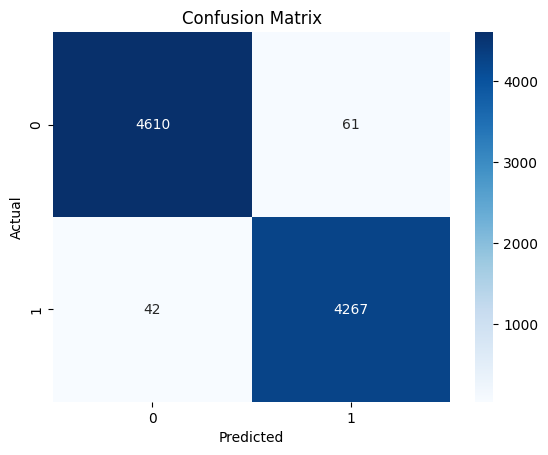

In [19]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [34]:
from sklearn.metrics import f1_score

# Binary classification (0 = FAKE, 1 = REAL)
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()

accuracy_from_cm = (TP + TN) / (TP + TN + FP + FN)
print("Calculated Accuracy:", accuracy_from_cm)

F1 Score: 0.9880745629269422
Calculated Accuracy: 0.9885300668151448


In [20]:
import pickle

# Save model and vectorizer
with open("fake_news_model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)


In [22]:
with open("fake_news_model.pkl", "rb") as f:
    model = pickle.load(f)

with open("tfidf_vectorizer.pkl", "rb") as f:
    vectorizer = pickle.load(f)

In [23]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [24]:
def preprocess(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [25]:
def predict_news(news_text):
    clean = preprocess(news_text)
    vect_text = vectorizer.transform([clean])
    pred = model.predict(vect_text)[0]
    return "REAL" if pred == 1 else "FAKE"

In [31]:
news = input("Enter the news text: ")
print("Prediction:", predict_news(news))

Enter the news text:  Rep. Alexandria Ocasio-Cortez (D-N.Y.) raised $9.6 million in the first three months of the year — more than double her second-highest quarter — a massive haul that comes amid increasing calls by progressives for her to mount a 2028 primary challenge against Senate Minority Leader Chuck Schumer.  Ocasio-Cortez, who now has more than $8 million in cash-on-hand, has spent recent weeks barnstorming the country with Sen. Bernie Sanders (I-Vt.) on his “Fighting Oligarchy” tour, drawing thousands of supporters. Her fundraising was included in a Federal Elections Commission report filed Tuesday.A leader of the progressive movement, Ocasio-Cortez has long been a fundraising powerhouse who draws upon a vast network of small-dollar donors.   She said in a post on X that the average campaign donation was $21, and campaign manager Oliver Hidalgo-Wohlleben said in a statement that 64 percent of contributions came from first-time donors, adding that “AOC doesn’t take a dollar f

Prediction: REAL
